In [246]:
#importing useful libraries 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing warnings
import warnings
warnings.filterwarnings('ignore')

#display options by pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#reading csv file in pandas
data = pd.read_csv('household_power_consumption.txt' ,  sep=';')
data.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [247]:
#cleanig fucntion for this dataset
data.dropna(inplace=True)
#This is shape of our dataset after cleaning function
print("This dataset has " +  str(data.shape[0]) + " rows and")
print(str(data.shape[1]) + " columns")

This dataset has 2049280 rows and
9 columns


In [248]:
#column names
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], dtype='object')

In [249]:
#checking datatypes of columns
data.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [250]:
# converting dtypes using astype 
data['Date']= pd.to_datetime(data['Date'])
data['Time']= pd.to_timedelta(data['Time'])
data['Global_active_power'] = data['Global_active_power'].astype(float)
data['Global_reactive_power'] = data['Global_reactive_power'].astype(float)
data['Voltage'] = data['Voltage'].astype(float)
data['Global_intensity'] = data['Global_intensity'].astype(float)
data['Sub_metering_1'] = data['Sub_metering_1'].astype(float)
data['Sub_metering_2'] = data['Sub_metering_2'].astype(float)
data['Sub_metering_3'] = data['Sub_metering_3'].astype(float)
data.dtypes

Date                      datetime64[ns]
Time                     timedelta64[ns]
Global_active_power              float64
Global_reactive_power            float64
Voltage                          float64
Global_intensity                 float64
Sub_metering_1                   float64
Sub_metering_2                   float64
Sub_metering_3                   float64
dtype: object

In [251]:
#Descriptive statistics
data.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
Time,0 days 11:59:44.088557,0 days 06:55:52.414455,0 days 00:00:00,0 days 05:59:00,0 days 12:00:00,0 days 18:00:00,0 days 23:59:00
Global_active_power,1.09162,1.05729,0.076,0.308,0.602,1.528,11.122
Global_reactive_power,0.123714,0.112722,0,0.048,0.1,0.194,1.39
Voltage,240.84,3.23999,223.2,238.99,241.01,242.89,254.15
Global_intensity,4.62776,4.4444,0.2,1.4,2.6,6.4,48.4
Sub_metering_1,1.12192,6.15303,0,0,0,0,88
Sub_metering_2,1.29852,5.82203,0,0,0,1,80
Sub_metering_3,6.45845,8.43715,0,0,1,17,31


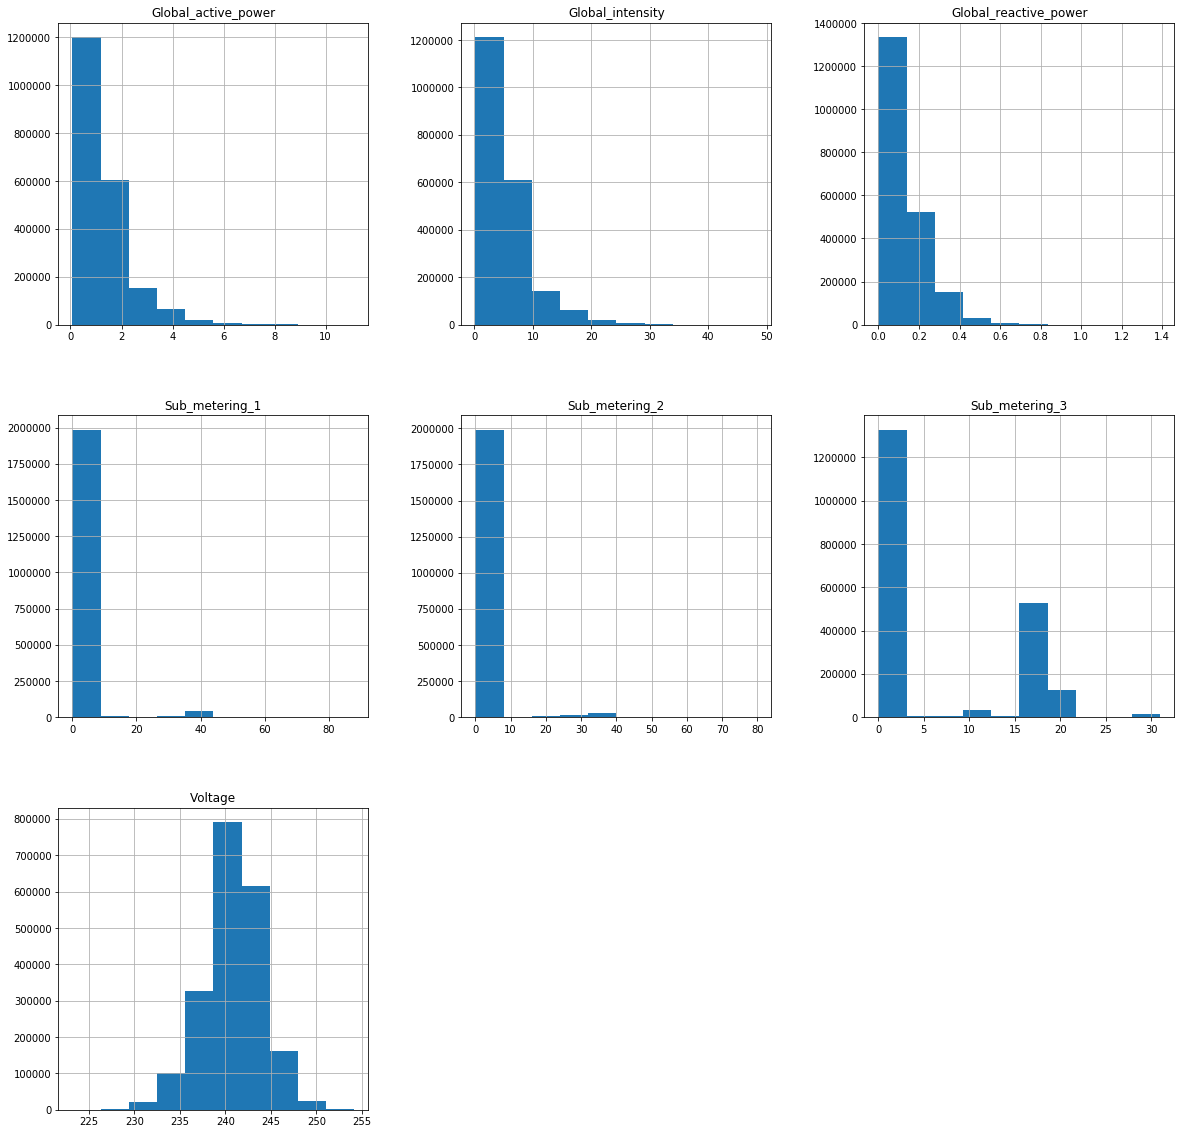

In [252]:
# Understanding columns using Data visualization
data.hist(figsize = (20, 20))
plt.show()

In [253]:
#creating some new columns for better analysis
import datetime
data['Weekday'] = data['Date'].dt.day_name()
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Hour'] = data['Time'].dt.components.hours
data.sample(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Weekday,Month,Year,Hour
1727955,2010-03-30,16:39:00,0.868,0.094,240.38,3.6,0.0,0.0,1.0,Tuesday,3,2010,16
944137,2008-02-10,09:01:00,2.768,0.292,236.15,11.8,0.0,0.0,18.0,Sunday,2,2008,9
539873,2007-12-26,15:17:00,2.054,0.000,245.99,8.4,1.0,0.0,19.0,Wednesday,12,2007,15
854195,2008-07-31,21:59:00,3.474,0.580,235.41,15.0,0.0,0.0,0.0,Thursday,7,2008,21
498125,2007-11-27,15:29:00,1.462,0.098,244.51,6.0,0.0,0.0,18.0,Tuesday,11,2007,15


In [254]:
#sum of all column using groupby
data1 = data[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1'
              ,'Sub_metering_2','Sub_metering_3','Weekday']].groupby(['Weekday']).sum().reset_index()
#arranging weekdays
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data1['Weekday'] = pd.Categorical(data1.Weekday,categories=weekdays)
data2 = data1.sort_values('Weekday')
data2['Weekday'] = data2['Weekday'].astype(str)
data2

,Weekday,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,Monday,301320.048,34652.092,7.042345e+07,1277761.0,269458.0,330671.0,1860764.0
5,Tuesday,318865.054,35513.250,7.076746e+07,1351997.2,269699.0,394981.0,1881391.0
6,Wednesday,316833.640,35559.790,7.095888e+07,1342120.8,325325.0,432229.0,1874712.0
4,Thursday,301676.846,34960.514,7.096408e+07,1277710.4,273041.0,277951.0,1834471.0
0,Friday,313189.320,35811.828,7.070459e+07,1327529.2,295536.0,320845.0,1960234.0
2,Saturday,345139.180,38360.618,6.988554e+07,1463149.8,410445.0,416290.0,2048721.0
3,Sunday,340000.774,38667.510,6.984432e+07,1443306.2,455631.0,488064.0,1774874.0


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

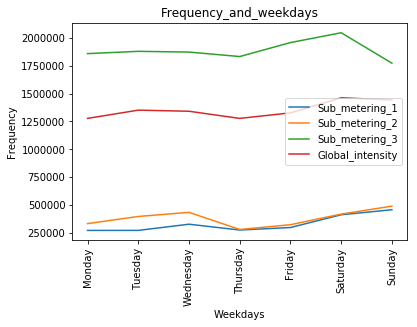

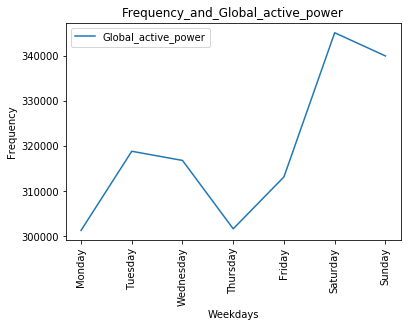

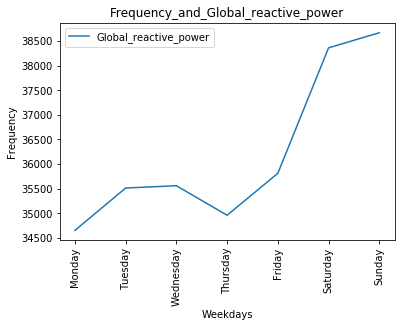

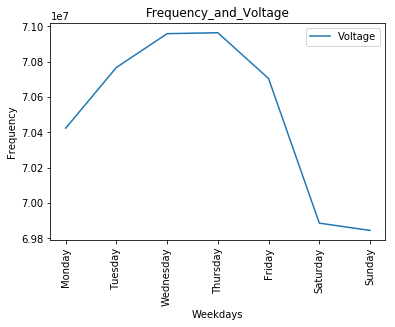

In [255]:
#Data visualization using weekdays of Sub_metering_1,Sub_metering_2 and Sub_metering_3  columns
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(data2['Weekday'] , data2['Sub_metering_1'])
plt.plot(data2['Weekday'] , data2['Sub_metering_2'])
plt.plot(data2['Weekday'] , data2['Sub_metering_3'])
plt.plot(data2['Weekday'] , data2['Global_intensity'])

plt.xlabel('Weekdays')
plt.ylabel("Frequency")
plt.title('Frequency_and_weekdays')
plt.legend(loc='best')
plt.xticks(rotation=90)
#Data visulization of weekdays and global_active_power
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(data2['Weekday'] , data2['Global_active_power'])
plt.xlabel('Weekdays')
plt.ylabel("Frequency")
plt.title('Frequency_and_Global_active_power')
plt.legend()
plt.xticks(rotation=90)
#Data visulization of weekdays and global_reactive_power
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(data2['Weekday'] , data2['Global_reactive_power'])
plt.xlabel('Weekdays')
plt.ylabel("Frequency")
plt.title('Frequency_and_Global_reactive_power')
plt.legend()
plt.xticks(rotation=90)

#Data visulization of weekdays and Voltage
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(data2['Weekday'] , data2['Voltage'])
plt.xlabel('Weekdays')
plt.ylabel("Frequency")
plt.title('Frequency_and_Voltage')
plt.legend()
plt.xticks(rotation=90)

#Analysis on the basis of weekdays

•Maximum power is used on electric water-heater and an air-conditioner and minimum power is used on dishwasher, an oven and a       microwave over a  period of 5 years .

•Global active and  reactive power is used maximum on sundays and saturdays.

•Voltage is less on saturdays and sundays and maximum at wednesday and thursday.

In [256]:
#analyis using hour range
data['Range_of_hours']= pd.cut(data['Hour'] , bins = (0,2,4,6,8,10,12,14,16,18,20,22,24) )
data3 = data[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1'
              ,'Sub_metering_2','Sub_metering_3','Range_of_hours']].groupby(['Range_of_hours']).sum().reset_index()
data3['Range_of_hours'] = data3['Range_of_hours'].astype(str)
data3

,Range_of_hours,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,"(0, 2]",87143.682,17948.096,4.137940e+07,373967.6,33733.0,63917.0,374148.0
1,"(2, 4]",75871.756,17299.728,4.141523e+07,326926.2,9811.0,58405.0,303776.0
2,"(4, 6]",106171.200,17021.272,4.126864e+07,453506.0,6406.0,55418.0,543334.0
3,"(6, 8]",252734.978,18832.512,4.089028e+07,1063053.4,143035.0,129039.0,1995932.0
4,"(8, 10]",221076.622,19026.470,4.082979e+07,931501.6,222295.0,223679.0,2046340.0
5,"(10, 12]",209187.854,23092.346,4.090349e+07,888860.4,261686.0,345154.0,1648773.0
6,"(12, 14]",190154.266,22414.564,4.116667e+07,805675.2,235004.0,418870.0,1341630.0
7,"(14, 16]",165563.918,22733.420,4.129490e+07,702270.6,208215.0,334191.0,994437.0
8,"(16, 18]",203245.324,23476.282,4.092768e+07,866249.6,173420.0,318069.0,950594.0
9,"(18, 20]",310861.324,29284.132,4.088610e+07,1322292.8,460686.0,343681.0,1299679.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

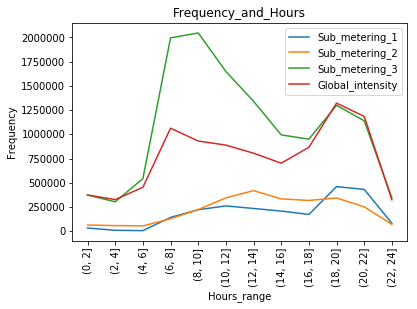

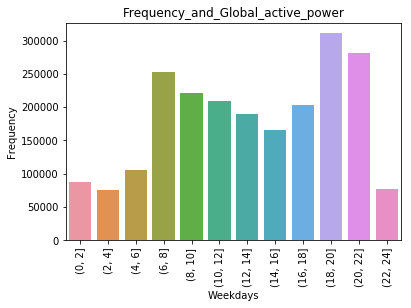

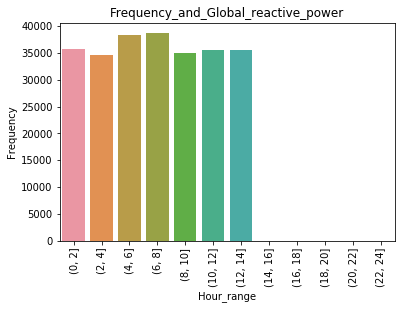

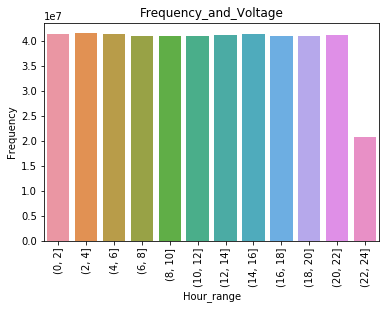

In [257]:
#Data visualization usingRange_of_hours of Sub_metering_1,Sub_metering_2 and Sub_metering_3  columns
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(data3['Range_of_hours'] , data3['Sub_metering_1'])
plt.plot(data3['Range_of_hours'] , data3['Sub_metering_2'])
plt.plot(data3['Range_of_hours'] , data3['Sub_metering_3'])
plt.plot(data3['Range_of_hours'] , data3['Global_intensity'])
plt.xlabel('Hours_range')
plt.ylabel("Frequency")
plt.title('Frequency_and_Hours')
plt.legend(loc='best')
plt.xticks(rotation=90)

#Data visulization of Range_of_hours and global_active_power
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data3['Range_of_hours'] , data3['Global_active_power'])
plt.xlabel('Weekdays')
plt.ylabel("Frequency")
plt.title('Frequency_and_Global_active_power')
plt.xticks(rotation=90)

#Data visulization of Range_of_hours and global_reactive_power
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data3['Range_of_hours'] , data2['Global_reactive_power'])
plt.xlabel('Hour_range')
plt.ylabel("Frequency")
plt.title('Frequency_and_Global_reactive_power')
plt.xticks(rotation=90)

#Data visulization of Range_of_hours and Voltage
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data3['Range_of_hours'] , data3['Voltage'])
plt.xlabel('Hour_range')
plt.ylabel("Frequency")
plt.title('Frequency_and_Voltage')
plt.xticks(rotation=90)

# Analysis on the basis of hour range

•Maximum power is used on electric water-heater and an air-conditioner  during  6 to 10  hour and minimum power is used on 
    dishwasher, an oven and a microwave over a  period of 5 years .

•Global active is maximum at 18 to 20th hour and  reactive power is used during 0-14 hour.

•minimum voltage at 22 to 24 hour

In [273]:
#Analysis using  weekdays with Range of hours
data4 = data[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1'
              ,'Sub_metering_2','Sub_metering_3','Range_of_hours','Weekday']].groupby(['Range_of_hours','Weekday']).sum().reset_index()
data4  # we can easily say when column value is maximumm or minumum with combination of weekdays and hours

,Range_of_hours,Weekday,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,"(0, 2]",Friday,11530.266,2507.356,5931046.97,49603.4,1888.0,8984.0,57579.0
1,"(0, 2]",Monday,10766.198,2532.762,5874358.61,46621.4,935.0,8206.0,43530.0
2,"(0, 2]",Saturday,11902.656,2545.164,5898819.14,51128.0,1631.0,9768.0,46703.0
3,"(0, 2]",Sunday,17449.498,2810.668,5841194.33,74126.2,19271.0,11511.0,69630.0
4,"(0, 2]",Thursday,11721.672,2585.102,5955365.19,50329.8,3031.0,8993.0,50141.0
5,"(0, 2]",Tuesday,11760.264,2493.998,5924888.12,50646.2,2692.0,7941.0,48807.0
6,"(0, 2]",Wednesday,12013.128,2473.046,5953728.78,51512.6,4285.0,8514.0,57758.0
7,"(2, 4]",Friday,10409.484,2447.488,5935944.63,44967.0,441.0,8549.0,43943.0
8,"(2, 4]",Monday,10380.000,2429.716,5881377.68,44861.6,0.0,7663.0,45732.0
9,"(2, 4]",Saturday,11155.518,2434.362,5879328.40,47947.0,1228.0,9494.0,42589.0


In [319]:
#descriptive analysis of weekdays with range of hours
data4.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,84.000000,84.000000,8.400000e+01,84.000000,84.000000,84.000000,84.000000
mean,25960.109214,2901.147548,5.628871e+06,110042.973810,26999.809524,31113.690476,154542.202381
std,11454.560401,674.548464,8.078371e+05,48260.426447,22881.343199,21020.445980,88743.011340
min,9692.050000,1398.554000,2.936577e+06,40818.600000,0.000000,7099.000000,37191.000000
25%,14875.008000,2488.760000,5.823993e+06,62746.200000,7978.500000,9458.750000,67730.750000
50%,26580.649000,2881.453000,5.869156e+06,113110.100000,21988.000000,29220.500000,155987.500000
75%,34630.318500,3212.707500,5.904467e+06,146854.900000,44290.000000,46303.250000,227104.250000
max,48018.682000,4382.832000,5.965320e+06,204456.600000,77804.000000,80810.000000,334177.000000


Text(0.5,1,'correlation between global and active power')

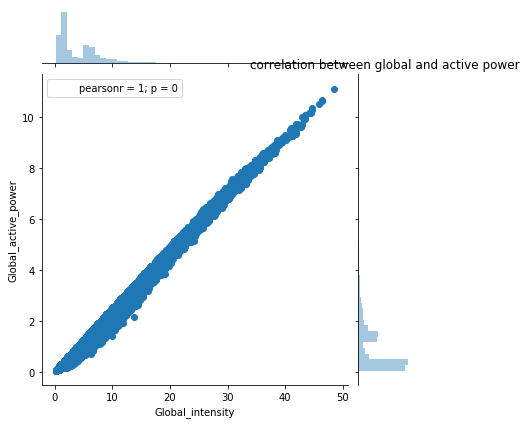

In [267]:
#correlations between 'Global_intensity' and 'Global_active_power throughd data visulization
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data) 
plt.title('correlation between global and active power')

Text(0.5,1,'Correlation between voltage and global active power')

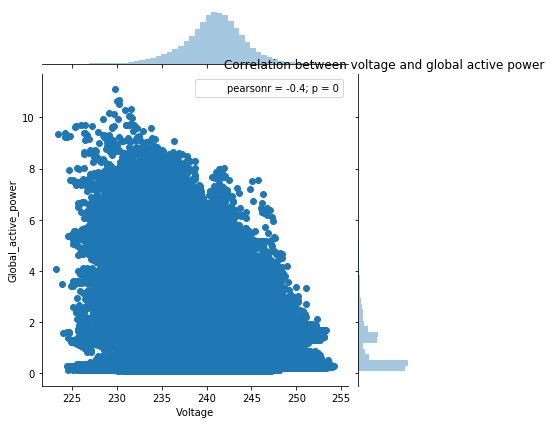

In [277]:
## The correlations between 'Voltage' and  'Global_active_power'
sns.jointplot(x='Voltage', y='Global_active_power', data=data)  
plt.title('Correlation between voltage and global active power')

In [321]:
#Analysis on the basis of month
data5 = data[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2'
              ,'Sub_metering_3','Range_of_hours','Month','Global_reactive_power']].groupby(['Month']).sum().reset_index()
data5['Month'] = data5['Month'].astype(str)
data5

,Month,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_reactive_power
0,1,234061.396,20131.430,4.212950e+07,986293.6,248760.0,231582.0,1302498.0,20131.430
1,2,176932.806,17264.074,3.886130e+07,745260.8,143787.0,204997.0,1029110.0,17264.074
2,3,204147.762,20684.040,4.223232e+07,861424.4,217779.0,260707.0,1206581.0,20684.040
3,4,174625.326,20809.586,4.034692e+07,740665.4,162211.0,233073.0,1053764.0,20809.586
4,5,186932.790,22770.770,4.243178e+07,798167.6,220359.0,242003.0,1170720.0,22770.770
5,6,161706.886,23952.480,4.040039e+07,693803.4,203738.0,210020.0,1028243.0,23952.480
6,7,144526.316,23660.798,4.248043e+07,622961.2,145137.0,191916.0,860175.0,23660.798
7,8,141636.944,23075.934,4.069654e+07,607826.0,159568.0,187289.0,895863.0,23075.934
8,9,171498.684,21265.808,3.996192e+07,729722.0,183417.0,204194.0,1077044.0,21265.808
9,10,199099.040,20920.052,4.266889e+07,839960.4,184889.0,239922.0,1158567.0,20920.052


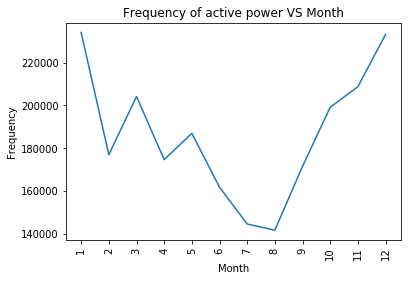

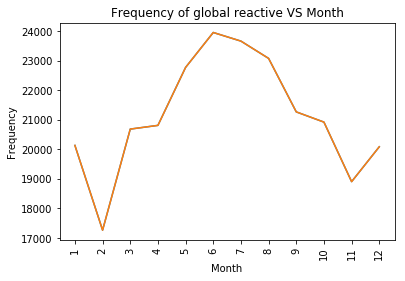

In [325]:
#Anlysis on the basis of months
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(data5['Month'] , data5['Global_active_power'])
plt.xlabel('Month')
plt.ylabel("Frequency")
plt.title('Frequency of active power VS Month')
plt.xticks(rotation=90)

fig, ax = plt.subplots(figsize=(6,4))
plt.plot(data5['Month'] , data5['Global_reactive_power'])
plt.xlabel('Month')
plt.ylabel("Frequency")
plt.title('Frequency of global reactive VS Month')
plt.xticks(rotation=90)
plt.show()

#Analysis on basis of month

we can clearly say that on the basis of the above graph that global active power is minimum at 7 and 8th hour and grobal
reactive power is minimum at 2nd month 

In [316]:
#Analysis on the basis of Year
data6 = data[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1'
              ,'Sub_metering_2','Sub_metering_3','Range_of_hours','Year']].groupby(['Year']).sum().reset_index()
data6['Year'] = data6['Year'].astype(str)
data6

,Year,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006,41813.282,2889.436,5.309773e+06,1.765948e+05,27460.0,48712.0,162951.0
1,2007,582708.186,61225.736,1.248792e+08,2.485492e+06,642548.0,854360.0,3022840.0
2,2008,564893.094,61705.338,1.267873e+08,2.398458e+06,584784.0,661905.0,3179187.0
3,2009,562315.198,68505.726,1.261044e+08,2.374625e+06,592657.0,592145.0,3556816.0
4,2010,485295.102,59199.366,1.104678e+08,2.048404e+06,451686.0,503909.0,3313373.0


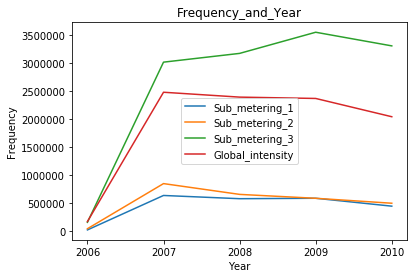

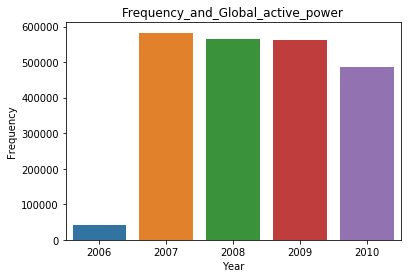

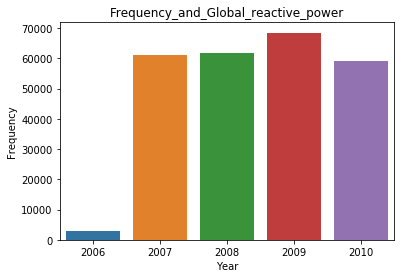

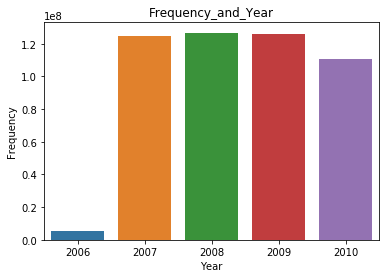

In [318]:
#Data visualization using yeat and  Sub_metering_1,Sub_metering_2, Sub_metering_3 and Global_intensity columns
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(data6['Year'] , data6['Sub_metering_1'])
plt.plot(data6['Year'] , data6['Sub_metering_2'])
plt.plot(data6['Year'] , data6['Sub_metering_3'])
plt.plot(data6['Year'] , data6['Global_intensity'])
plt.xlabel('Year')
plt.ylabel("Frequency")
plt.title('Frequency_and_Year')
plt.legend(loc='best')

#Data visulization of year  and global_active_power
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data6['Year'] , data6['Global_active_power'])
plt.xlabel('Year')
plt.ylabel("Frequency")
plt.title('Frequency_and_Global_active_power')

#Data visulization of Year and global_reactive_power
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data6['Year'] , data6['Global_reactive_power'])
plt.xlabel('Year')
plt.ylabel("Frequency")
plt.title('Frequency_and_Global_reactive_power')

#Data visulization of year and Voltage
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data6['Year'] , data6['Voltage'])
plt.xlabel('Year')
plt.ylabel("Frequency")
plt.title('Frequency_and_Year')
plt.show()

#Analysis on the basis of year

It is clear that consumption increased dramatically after 2006 and values of electric water-heater and an air-conditioner
are always maximum maximum consumption is in 2009 . Other analysis we have already discussed.